# ASSIGNMENT-15.1-RANDOM FORESTS

## A cloth manufacturing company is interested to know about the segment or attributes causes high sale

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
import warnings

warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('Company_data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<AxesSubplot:>

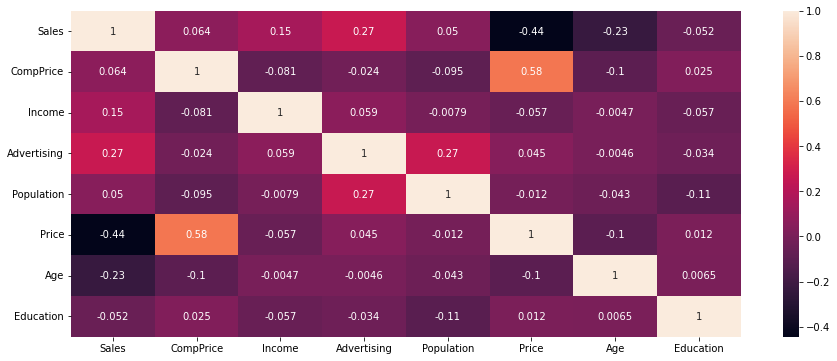

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

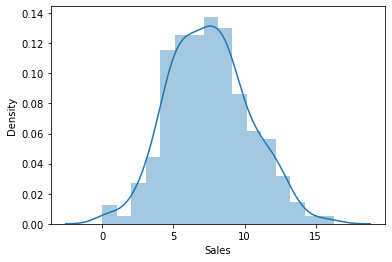

In [8]:
sns.distplot(df.Sales)
plt.show()

In [9]:
#grouping sales units 
bins = [0,6,12,18]
labels= [0,1,2]
df['Sales_Group'] = pd.cut(df['Sales'],bins=bins, labels=labels,right=False)

In [10]:
# label encoding

def label_encoding(data):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    
    for i in data.select_dtypes(include=object).columns:
        data[i]= label_encoder.fit_transform(data.select_dtypes(include=object)[i]) 
        
    return data.head()

label_encoding(df)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Group
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [16]:
# from sklearn.tree import  DecisionTreeClassifier

from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Splitting data into training and testing data set
x=df.iloc[:,1:-1]
y=df.iloc[:,-1:]
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40,stratify = y)

In [19]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [20]:
y

,Sales_Group
0,1
1,1
2,1
3,1
4,0
...,...
395,2
396,1
397,1
398,0


In [24]:
model = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state=40)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=40)

In [25]:
# predicting on test data
y_pred = model.predict(x_test) 
pd.Series(y_pred).value_counts()           # getting the count of each category

1    84
0    36
dtype: int64

In [26]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[30,  9,  0],
       [ 6, 67,  0],
       [ 0,  8,  0]], dtype=int64)

In [27]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        39
           1       0.80      0.92      0.85        73
           2       0.00      0.00      0.00         8

    accuracy                           0.81       120
   macro avg       0.54      0.56      0.55       120
weighted avg       0.76      0.81      0.78       120



In [28]:
train_accuracy = []
test_accuracy = []
for n_estimators in range(1,200):
    model1 = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy', random_state=40)
    model1.fit(x_train, y_train)
    train_accuracy.append(model1.score(x_train, y_train))
    test_accuracy.append(model1.score(x_test, y_test))

In [29]:
frame = pd.DataFrame({'max_depth':range(1,200),'train_acc':train_accuracy, 'test_acc':test_accuracy})

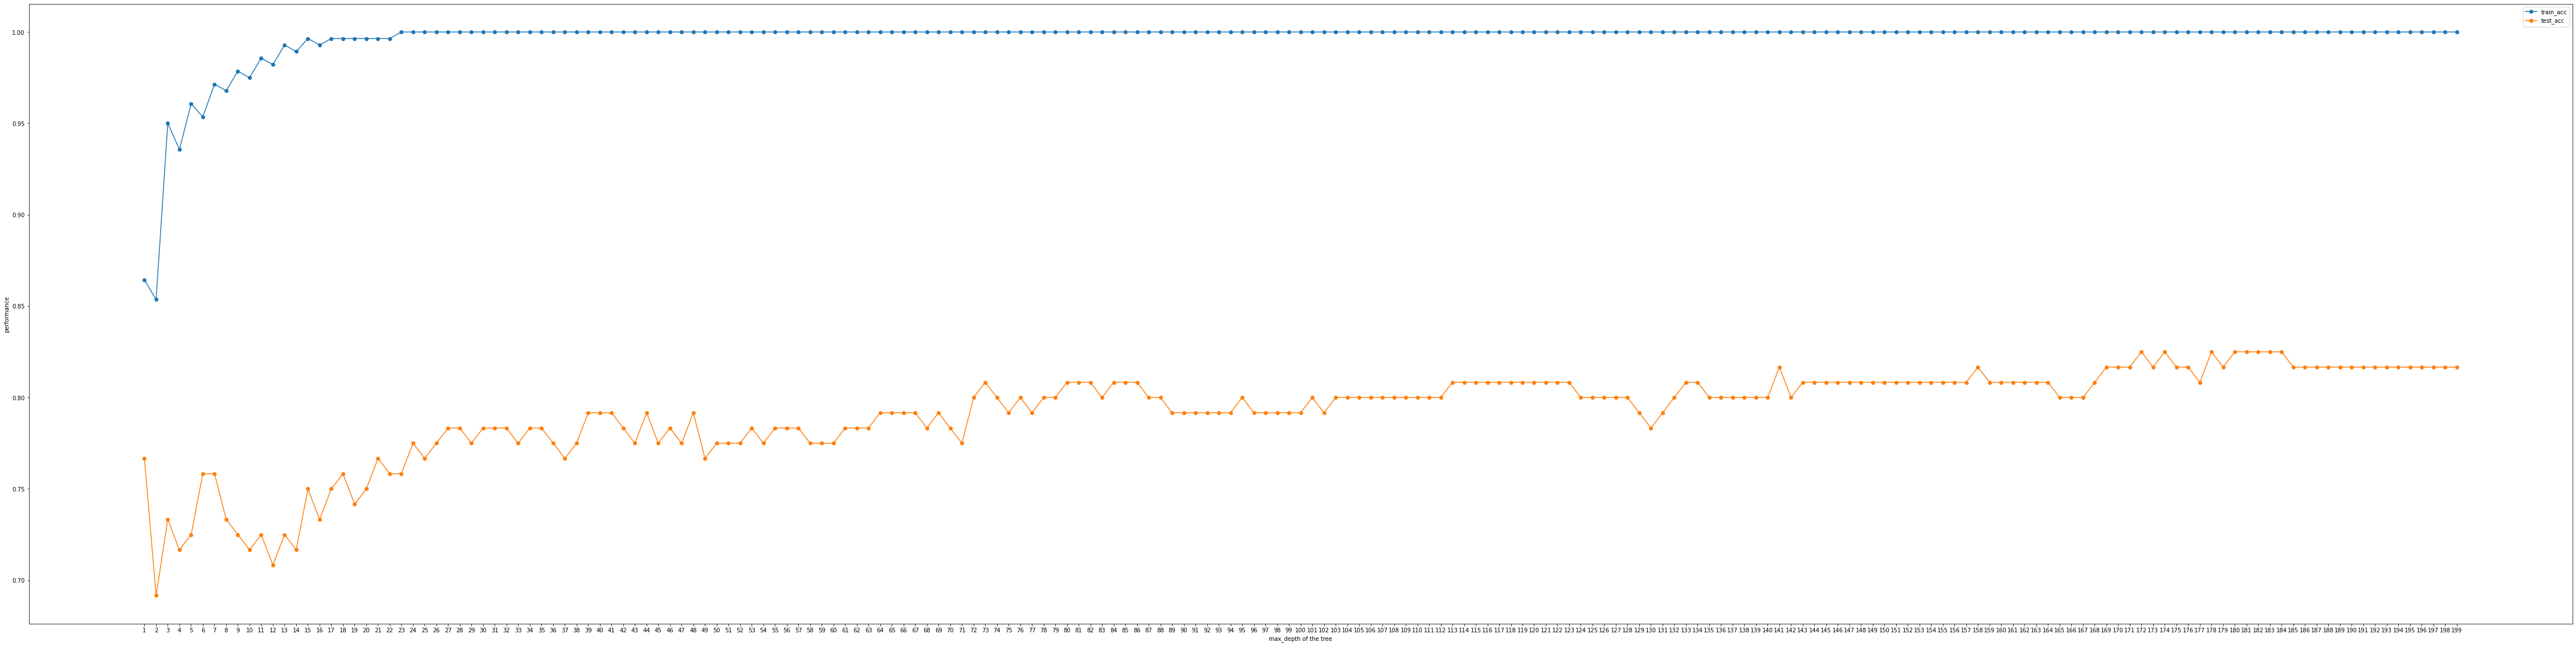

In [30]:
# visulizing accuracy graph to look over max_depth

labels =['train_acc','test_acc']
fig = plt.figure(figsize=(80,20))
ax = fig.add_subplot()
plt.plot(frame['max_depth'], frame['train_acc'], marker = 'o')
plt.plot(frame['max_depth'], frame['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,200))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()

# Accuracy of model with 150 no.of trees is 81%.